### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using mergesort and output of some statistics

In [1]:
# this code contains counters for outputting statistics
# the counters are incremented after the action to be counted happened
# even if we work with lists we count necessary assignment of single keys
def sort(a, outputStats = True):
    result, comparison_keys, assignment_key = mergesort(a)
    if outputStats:
        # output of counters, "# ..." means "number of ..."
        print(TEXT_SPACING, "# keys in array =", len(a))
        print(TEXT_SPACING, "# key comparisons =", comparison_keys)
        print(TEXT_SPACING, "# key assignments =", assignment_key)
    return result, comparison_keys, assignment_key

In [2]:
def mergesort(a):
    # initialization of counters
    comparison_keys = 0
    assignment_key = 0

    if len(a) <= 1:
        return a, comparison_keys, assignment_key
    mid = len(a) // 2
    left, comp_keys_left, assign_keys_left = mergesort(a[0:mid])
    right, comp_keys_right, assign_keys_right = mergesort(a[mid:len(a)])
    comparison_keys += (comp_keys_left+comp_keys_right)
    assignment_key += (assign_keys_left+assign_keys_right)
    # improvement in case of (partially) sorted keys
    comparison_keys += 1
    if left[-1] <= right[0]:
        assignment_key += (len(left)+len(right)) # need to copy both arrays
        return left + right, comparison_keys, assignment_key
    else:
        result, comp_keys, assign_keys = merge(left, right)
        comparison_keys += comp_keys
        assignment_key += assign_keys
        return result, comparison_keys, assignment_key

In [3]:
def merge(left, right):
    # initialization of counters
    comparison_keys = 0
    assignment_key = 0
    result = []
    # remove the smallest available key and append it to result
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result += [left.pop(0)]
        else:
            result += [right.pop(0)]
        comparison_keys += 1
        assignment_key += 1
    # now one of the lists is empty, the other needs to be appended to result
    if len(left) > 0:
        assignment_key += len(left)
        result += left
    else:  
        assignment_key += len(right)
        result += right
    return result, comparison_keys, assignment_key

## Constants

In [4]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10
# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"
TEXT_SPACING = " "*len(TEXT_BEFORE_SORTING)

## Generate test data and test algorithm

In [5]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, sort(sorted_array)[0])

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                # keys in array = 10
                # key comparisons = 9
                # key assignments = 34
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, sort(reverse_sorted_array)[0])

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                # keys in array = 10
                # key comparisons = 28
                # key assignments = 34
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array)[0])

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
                # keys in array = 10
                # key comparisons = 29
                # key assignments = 34
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Your tests here ...

In [8]:
array = [1,3,2]
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array)[0])

Before sorting: [1, 3, 2]
                # keys in array = 3
                # key comparisons = 3
                # key assignments = 5
After  sorting: [1, 2, 3]


In [9]:
# ... and here ...

## Output of statistics to understand the behavior of algorithm

In [10]:
# for visualization we make use of pyplot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
# used for comparison
import math

## Constants

In [11]:
# the values of the array sizes in tests can be changed here
ARRAY_SIZES = list(range(10,201,10))
# this factor is usef for scaling up the behavior
FACTOR_COMPARISON = 1000

## Functions for scaling down the functions' behavior

In [12]:
# these functions are used as parameters for plot_results to scale down the behavior
def no(x):
    # 1-function, additionally eliminate the automatically added factor
    return FACTOR_COMPARISON
def linear(x):
    return x
def linear_times_log2(x):
    return x * math.log(x,2)

## Plot some parameters and compare it with other behaviors

In [13]:
# create plot of number of keys and number of key comparisons (blue) and key assignments (red)
# the parameters are used for scaling down the graphical outputs for identification of the function growth
def plot_results(results, f1 = no, f2 = no):
    plt.figure(figsize=(15, 8))
    # plot functions without modification
    plt.plot([len(r[0]) for r in results],[r[1] for r in results], "bo-")
    plt.plot([len(r[0]) for r in results],[r[2] for r in results], "ro-")
    # plot functions to compare it with behavior given as parameters (same color, no dots)
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[1]/f1(len(r[0])) for r in results], "b-")
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[2]/f2(len(r[0])) for r in results], "r-")
    plt.xticks(ARRAY_SIZES)
    plt.grid(True)
    plt.show()

## Tests

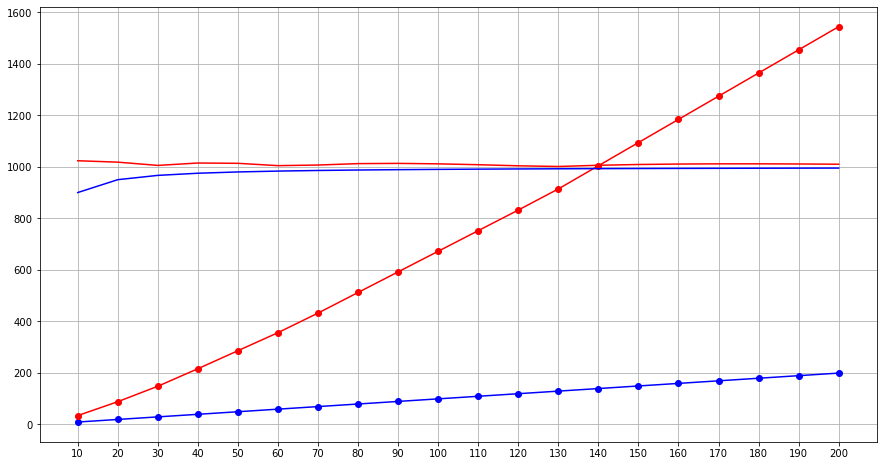

In [14]:
# test sorting sorted arrays
results = []
for i in ARRAY_SIZES:
    sorted_array = list(range(i))
    results.append(sort(sorted_array, outputStats=False))
plot_results(results, linear, linear_times_log2)

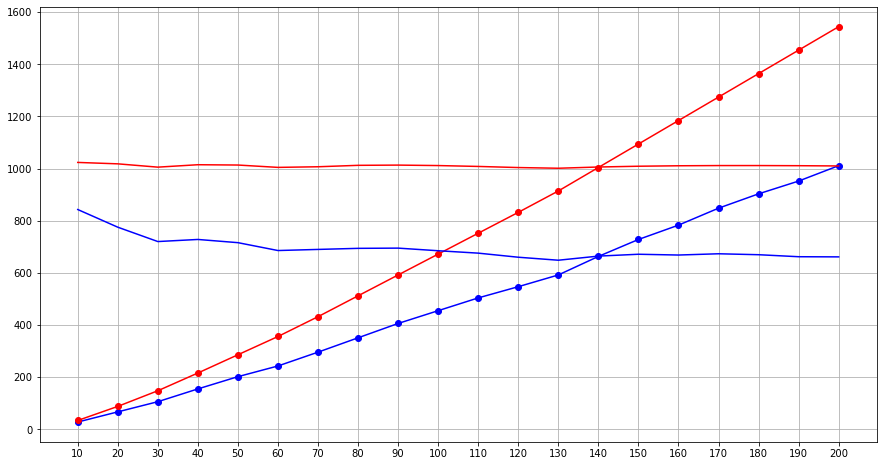

In [15]:
# test sorting reversly sorted arrays
results = []
for i in ARRAY_SIZES:
    reverse_sorted_array = list(range(i-1, -1, -1))
    results.append(sort(reverse_sorted_array, outputStats=False))
plot_results(results, linear_times_log2, linear_times_log2)

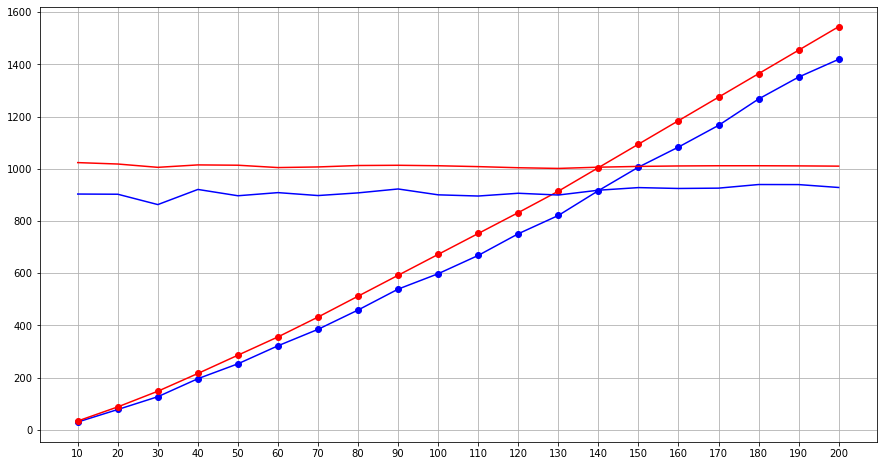

In [16]:
# test sorting random arrays
results = []
for i in ARRAY_SIZES:
    array = list(numpy.random.permutation(i))
    results.append(sort(array, outputStats=False))
plot_results(results, linear_times_log2, linear_times_log2)